------------------
## Caso 3 — Estimación funcional

Observa los siguientes pares de valores $x$, $y$. Predice cuál será el valor asociado a un $x=-0.16$

<center>

|      $x$      |     $y$      |
|-------------|------------|
|  0.808      | 1.081      |
|  0.087      | 3.166      |
| -0.359      | 1.801      |
| -0.281      | 1.949      |
|  0.257      | 2.024      |
|  0.279      | 1.979      |
|  0.604      | 1.275      |
| -0.303      | 1.880      |
|  0.722      | 1.126      |
| -0.760      | 1.130      |
|  0.407      | 1.627      |
|  0.215      | 2.247      |
| -0.912      | 1.081      |
|  0.013      | 5.006      |
| -0.972      | 1.032      |


</center>

In [2]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# data
x = [0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 0.407, 0.215, -0.912, 0.013, -0.972]
y = [1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130, 1.627, 2.247, 1.081, 5.006, 1.032]

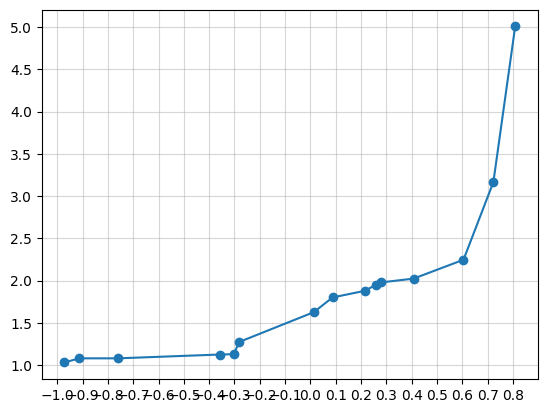

<Figure size 1200x800 with 0 Axes>

In [53]:
sorted_x = sorted(x)
sorted_y = sorted(y)
plt.plot(sorted_x, sorted_y, marker="o", linestyle="-")

plt.grid(alpha=0.5)

plt.locator_params(axis="x", nbins=20)
plt.figure(figsize=(12, 8))

plt.show()

In [28]:
x_data = np.array(x).reshape(-1, 1)
x_data

array([[ 0.808],
       [ 0.087],
       [-0.359],
       [-0.281],
       [ 0.257],
       [ 0.279],
       [ 0.604],
       [-0.303],
       [ 0.722],
       [-0.76 ],
       [ 0.407],
       [ 0.215],
       [-0.912],
       [ 0.013],
       [-0.972]])

In [38]:
x_data = np.array(x).reshape(-1, 1)
y_data = np.array(y)

model = RandomForestRegressor(n_estimators=100, random_state=42)
#train
model.fit(x_data, y_data)

x_new = np.array([[-0.16]])
y_pred = model.predict(x_new)

print(f"x={x_new[0][0]}, y= {y_pred[0]}")

x=-0.16, y= 2.233900000000002


In [ ]:
x_data = np.array(x).reshape(-1, 1)
y_data = np.array(y)

model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
#train
model.fit(x_data, y_data)

x_new = np.array([[-0.16]])
y_pred = model.predict(x_new)

print(f"x={x_new[0][0]}, y= {y_pred[0]}")

x=-0.16, y= 2.1916759999999926


In [45]:
#aproximacion por regresion exponenecial

def exponential_regression(x_data, y_data):
    log_y = np.log(y_data)

    b, A = np.polyfit(x_data, log_y, 1)

    a = np.exp(A)

    return a, b

def interpolate_exponential_regression(x_data, y_data, x_val):
    a, b = exponential_regression(x_data, y_data)

    y_val = a * np.exp(b * x_val)

    return y_val

x = [0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722, -0.760, 0.407, 0.215, -0.912, 0.013, -0.972]
y = [1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126, 1.130, 1.627, 2.247, 1.081, 5.006, 1.032]
x_data = np.array(sorted(x))
y_data = np.array(sorted(y))

x_val = -0.16

y_interpolado = interpolate_exponential_regression(x_data, y_data, x_val)
print(y_interpolado)


1.5348627625081195


### mierda con spicy 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array([0.808, 0.087, -0.359, -0.281, 0.257, 0.279, 0.604, -0.303, 0.722,
              -0.760, 0.407, 0.215, -0.912, 0.013, -0.972])
y = np.array([1.081, 3.166, 1.801, 1.949, 2.024, 1.979, 1.275, 1.880, 1.126,
              1.130, 1.627, 2.247, 1.081, 5.006, 1.032])

C:\Users\34640\AppData\Local\Temp\ipykernel_33148\1985988040.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


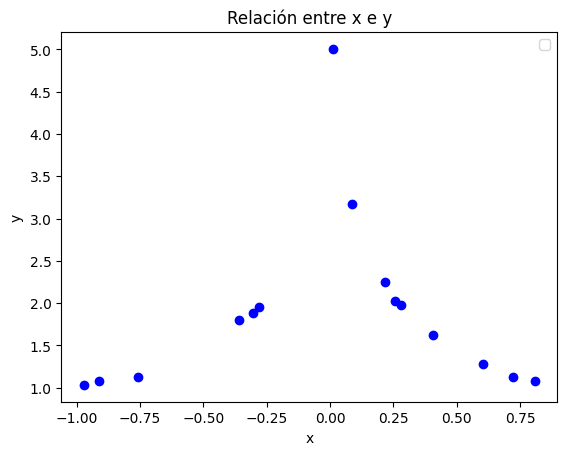

In [ ]:
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [62]:
def modelo(x, a, b, c):
    return a * np.exp(-b * np.abs(x)) + c

parametros_ini = [5, 1, 1]  # Suposición inicial de los parámetros
parametros_optimos, covarianza = curve_fit(modelo, x, y, p0=parametros_ini)

a_opt, b_opt, c_opt = parametros_optimos
print(f"a = {a_opt} b = {b_opt} c = {c_opt}")

x_pred = -0.16
y_pred = modelo(x_pred, a_opt, b_opt, c_opt)
print(f"x = {x_pred} y = {y_pred:.3f}")

a = 3.9936864246674784 b = 5.662535747794341 c = 1.10212398501903
x = -0.16 y = 2.716


C:\Users\34640\AppData\Local\Temp\ipykernel_33148\2404336229.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


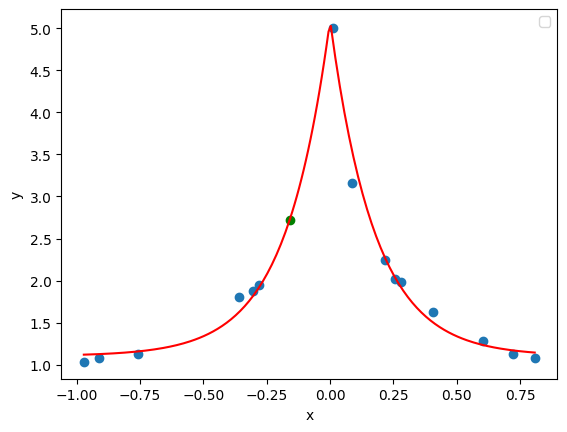

In [63]:
x_ajuste = np.linspace(min(x), max(x), 200)
y_ajuste = modelo(x_ajuste, a_opt, b_opt, c_opt)

plt.scatter(x, y)
plt.plot(x_ajuste, y_ajuste, color='red',)
plt.scatter(x_pred, y_pred, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### con tensorflow

prueba de como funciona


In [22]:
%pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:40
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:40
   ---------------------------------------- 0.8/390.3 MB 931.2 kB/s eta 0:06:59
   ---------------------------------------- 1.0/390.3 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 1.6/390.3 MB 1.2 MB/s eta 0:05:34
   ---------------------------------------- 2.1/390.3 MB 1.4 MB/s eta 0:04:38
   ---------------------------------------- 2.4/390.3 MB 1.5 MB/s eta 0:04:15
   ---------------------------------------- 2.6/390.3 MB 1.5 MB/s eta 0:04:27
   ---------------------------------------- 2.9/390.3 MB 1.4 MB/s eta 0:04:33
   ---------------------------------------- 3.4/390.3 MB 1.5 MB/s eta 0:04:18
   --------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
